In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.power as sm

In [2]:
hospital_data = pd.read_csv('../data/hospital_chosen_zip.csv', sep='|')

In [3]:
for feature in ['total_icu_beds_7_day_sum', 'inpatient_beds_7_day_sum', 'icu_beds_used_7_day_sum']:
    hospital_data = hospital_data[hospital_data[feature].notna()]
    if not feature == 'icu_beds_used_7_day_sum':
        hospital_data = hospital_data[hospital_data[feature] > 0]

hospital_data = hospital_data[hospital_data['total_icu_beds_7_day_sum'] > hospital_data['icu_beds_used_7_day_sum']]        
        
hospital_group = hospital_data.groupby('hospital_name')

### Null Hypothesis

During Covid, the average occupancy rate for inpatient beds is the same as the average occupancy rate for ICU beds

### Alternate Hypothesis

During Covid, the average occupancy rate for inpatient beds is higher than the average occupancy rate for ICU beds

In [4]:
alpha = 0.05

In [5]:
inpatient_percent = hospital_group.apply(lambda x: np.round(np.sum(x['inpatient_beds_used_7_day_sum'])
                                         / np.sum(x['inpatient_beds_7_day_sum']), 4))


(0.0, 1.0)

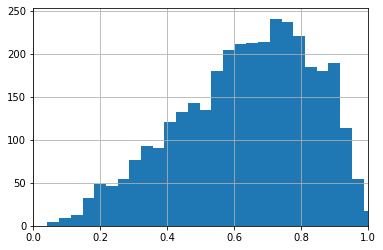

In [6]:
ax = inpatient_percent.hist(bins=500)
ax.set_xlim(0, 1)

In [7]:
icu_percent = hospital_group.apply(lambda x: np.round(np.sum(x['icu_beds_used_7_day_sum'])
                                         / np.sum(x['total_icu_beds_7_day_sum']), 4))


(0.0, 1.0)

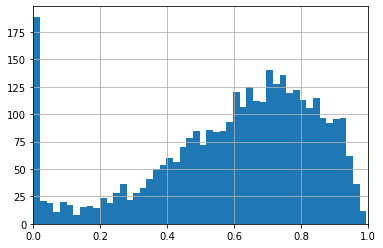

In [8]:
ax = icu_percent.hist(bins=50)
ax.set_xlim(0, 1)

In [21]:
inpatient_mean = np.mean(inpatient_percent)
inpatient_std = np.std(inpatient_percent)
inpatient_n = len(inpatient_percent)

icu_mean = np.mean(icu_percent)
icu_std = np.std(icu_percent)
icu_n = len(icu_percent)

effect_size = (inpatient_mean - icu_mean) / inpatient_std
nobs1 = inpatient_n
ratio = 1
alternative = 'two-sided'
effect_size

0.12950035545825228

In [23]:
power = sm.zt_ind_solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, power=None, ratio=ratio, alternative=alternative) 

In [24]:
power

0.9997112038873053